In [150]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,Subset,Dataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random 

In [151]:
device = ("cuda" if torch.cuda.is_available() == True else "cpu")
print(device)

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

x_train = torch.rand(3,224,224).to(device)

y = datasets.ImageFolder(r"C:\Users\sarma\OneDrive\Desktop\Git work\Datasets\PetImages",transform=transform)
print(len(y))
indice = torch.arange(1000)
indice2 = torch.arange(1000,2000)

y_part = Subset(y,indice)
x_part = Subset(y,indice2)
    
print(y_part)
    

cuda
25000


In [152]:
class customdataset(Dataset):
    def __init__ (self,features,labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index]
    
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3,32,7,2),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2,2),
                                    nn.Conv2d(32,64,3,1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2,2),
                                    )
        
        self.layer2 = nn.Sequential(nn.Flatten(),
                                    nn.Linear(64*26*26,128),
                                    nn.ReLU(),
                                    nn.Linear(128,256),
                                    nn.ReLU(),
                                    nn.Linear(256,512),
                                    nn.Linear(512,3*224*224),
                                    nn.Sigmoid()
                                    )
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(-1,3,224,224)
        return x


def hole(image_batch,hole_size = (64,64)):
    B,C,H,W = image_batch.shape
    hole_h,hole_w = hole_size
    cropped = image_batch.clone()
    for i in range(B):
        y1 = random.randint(0,H-hole_h)
        x1 = random.randint(0,W-hole_w)
        y2 = y1 + hole_h
        x2 = x1 + hole_w

        cropped[i,:,y1:y2,x1:x2] = 0

    return cropped

In [153]:
model = CNN().to(device)
data = customdataset(y_part,indice)
data_test = customdataset(x_part,indice2)
y_train = DataLoader(data,batch_size=32,shuffle=True)
data_test = DataLoader(data_test,32)

In [157]:
model.train()
epochs= 5
batch_size = 32
l = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

for e in range(5):
    total_loss = 0

    for a,b in y_train:
        a = a.to(device)
        x = hole(a)
        optimizer.zero_grad()
        output = model(x)
        loss = l(output,a)
        loss.backward()
        optimizer.step()
        total_loss +=loss.item()
    print(total_loss)



2.053424272686243
1.4849018603563309
1.326848603785038
1.2231825962662697
1.1813779845833778


tensor([[[0.7294, 0.7373, 0.7412,  ..., 0.6157, 0.5686, 0.5176],
         [0.7333, 0.7451, 0.7490,  ..., 0.6157, 0.5686, 0.5176],
         [0.7412, 0.7529, 0.7647,  ..., 0.6157, 0.5686, 0.5137],
         ...,
         [0.5725, 0.5647, 0.5765,  ..., 0.5961, 0.6039, 0.6078],
         [0.5804, 0.5725, 0.5843,  ..., 0.6118, 0.6078, 0.6078],
         [0.5922, 0.5804, 0.5804,  ..., 0.6157, 0.6118, 0.6078]],

        [[0.6941, 0.7020, 0.7059,  ..., 0.5843, 0.5373, 0.4863],
         [0.6980, 0.7098, 0.7137,  ..., 0.5843, 0.5373, 0.4863],
         [0.7059, 0.7176, 0.7294,  ..., 0.5843, 0.5373, 0.4824],
         ...,
         [0.5373, 0.5294, 0.5412,  ..., 0.5333, 0.5412, 0.5451],
         [0.5451, 0.5373, 0.5490,  ..., 0.5490, 0.5451, 0.5451],
         [0.5569, 0.5451, 0.5451,  ..., 0.5529, 0.5451, 0.5451]],

        [[0.6745, 0.6824, 0.6863,  ..., 0.5412, 0.4941, 0.4431],
         [0.6784, 0.6902, 0.6941,  ..., 0.5412, 0.4941, 0.4431],
         [0.6863, 0.6980, 0.7059,  ..., 0.5412, 0.4941, 0.

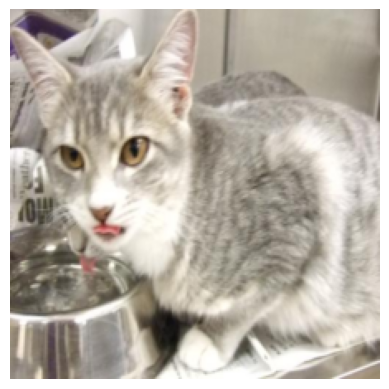

In [155]:
images,labels = next(iter(y_train))

img = images[0]
print(img)
print(labels)
print(img.shape)

plt.imshow(img.permute(1,2,0).numpy())
plt.axis("off")
plt.show()


torch.Size([1, 3, 224, 224])


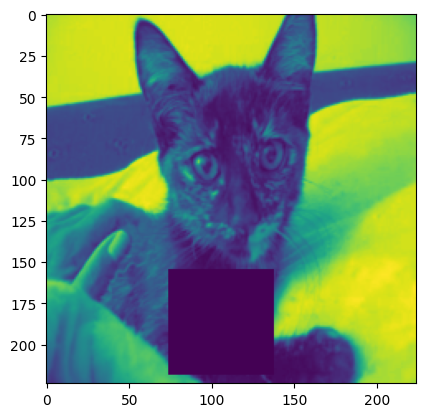

(224, 224, 3)


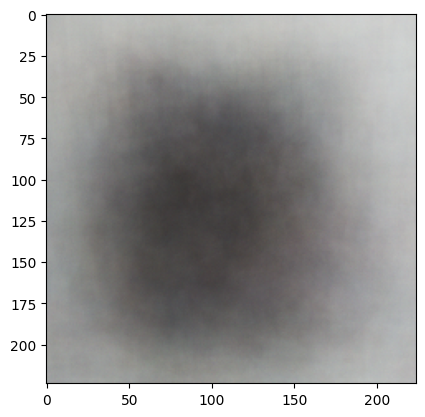

In [160]:
model.eval()

with torch.no_grad():
    i = 2

    test_img,test_lab = next(iter(data_test))
    test_img = hole(test_img).to(device)
    print(test_img[i].unsqueeze(0).shape)
    test_img = test_img[i].unsqueeze(0)
    test_imgi = test_img.squeeze(0).cpu().numpy()
    plt.imshow(test_imgi[i])
    plt.show()
    

    answer = model(test_img)
    answer = answer.squeeze(0).permute(1,2,0).cpu().numpy()
    print(answer.shape)
    plt.imshow(answer)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x676 and 43264x128)